In [84]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [78]:
def get_month(df, date_column_name):

    df[date_column_name + 'месяц'] = (df
                                        .astype('str')[date_column_name]
                                        .apply(lambda x: x[:8] + '01')
                                        .astype('datetime64')                    
                                      )
    
    return df

def date_distribution(df, date_column_name, plt_title):
    
    df = get_month(df, date_column_name)
    
    df = (df
            .groupby(date_column_name + 'месяц')\
            .size()\
            .reset_index()\
            .rename(columns={0:'cnt_rows'})
         )
    
    
    fig = plt.figure(figsize=(18,5))
    plt.bar(df[date_column_name + 'месяц'], df['cnt_rows'], width=12)
    plt.title(plt_title, fontsize=18)
    plt.xlabel(date_column_name + 'месяц')
    plt.ylabel('Количество')
    

# 1. Данные

# 1.1. Блокировки

In [109]:
blocks = pd.read_excel('Тестовое задание часть 1/Блокировки.xlsx')
blocks

,ИНН,Дата блокировки
0,UWJVWILNVB,2018-06-18
1,DIQZQQEMLN,2018-06-18
2,CECYYCSEAKLP,2018-06-19
3,OCMHZOYWACDN,2018-06-19
4,RDFCTRXYFYHM,2018-06-19
...,...,...
31209,ITXRQFDHZM,2020-02-05
31210,YTCGDUTSSX,2020-02-05
31211,KVXXJNREOVZI,2020-02-04
31212,YWWSFECEMI,2020-02-04


In [3]:
blocks.dtypes

ИНН                        object
Дата блокировки    datetime64[ns]
dtype: object

In [4]:
blocks['ИНН'].value_counts()

FDQWKIJXAD    4
ODKGYWTBNB    3
MQAJLJIMLX    3
ZGWVHPEAVG    3
PGYBZDASYU    3
             ..
AZDKIDTCML    1
YCMWSSPJKD    1
JPPKTSWICW    1
EGSBSFOSKN    1
QNUEPSZURE    1
Name: ИНН, Length: 30096, dtype: int64

In [5]:
blocks.sort_values('Дата блокировки', ascending=False).groupby('ИНН').head(1)

,ИНН,Дата блокировки
31180,GRNDPRCBRX,2020-02-05
31182,KMUQILZZCADA,2020-02-05
31191,SIVMQYSEOIFK,2020-02-05
31190,SCDKIJFUCSSP,2020-02-05
31189,QFERZBNJRG,2020-02-05
...,...,...
2204,OSHLVBFFWW,2018-06-18
2230,QJFHEORVRB,2018-06-18
2236,NLKKVPHOURKU,2018-06-18
2241,DLJAGCJJBG,2018-06-18


In [62]:
blocks.loc[lambda x: x['ИНН']=='FDQWKIJXAD']

,ИНН,Дата блокировки,Дата блокировкимесяц
9898,FDQWKIJXAD,2019-05-30,2019-05-01
10011,FDQWKIJXAD,2019-06-04,2019-06-01
11238,FDQWKIJXAD,2019-07-02,2019-07-01
12949,FDQWKIJXAD,2019-08-18,2019-08-01


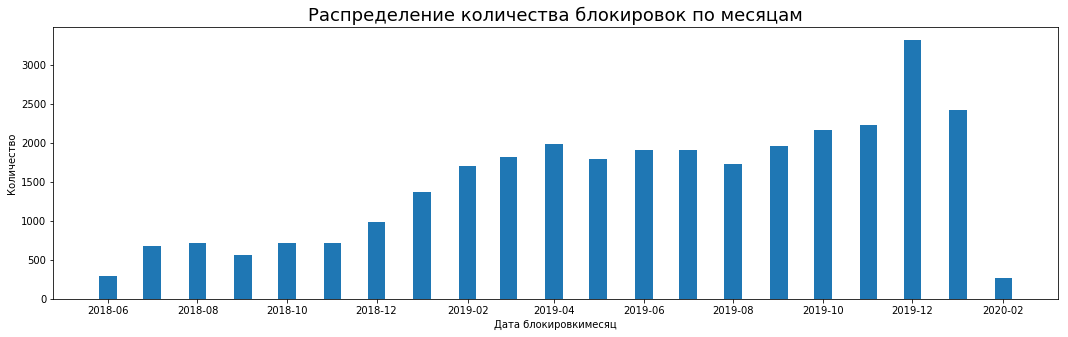

In [81]:
date_distribution(blocks, 'Дата блокировки', 'Распределение количества блокировок по месяцам')

In [33]:
print('Всего блокировок:', blocks.shape[0])
print('Уникальных ИНН с блокировкой:', blocks['ИНН'].value_counts().shape[0])

Всего блокировок: 31214
Уникальных ИНН с блокировкой: 30096


# 1.2. Заявки

In [87]:
inquires = pd.read_excel('Тестовое задание часть 1/Заявки.xlsx')

In [88]:
inquires['Дата заявки день'] = inquires['Дата заявки']\
                                                .astype('str')\
                                                .apply(lambda x: x[:10])\
                                                .astype('datetime64')

inquires = inquires.groupby(['ИНН', 'Тип организации', 'Дата заявки день'])['Дата заявки'].max().reset_index()

In [89]:
inquires['ИНН'].value_counts()

HGVERNZVPR      14
BQQAMCUYXH      13
QSLWIOCSGG      11
BYDTYIPRAJKN    11
VDAGPSZFKS      11
                ..
HUBRDJOXFXBA     1
PBNXKJABOO       1
UIPRVQUGYHNJ     1
GDBVOOGGGW       1
STPEMRFJKMFV     1
Name: ИНН, Length: 243851, dtype: int64

In [90]:
inquires.loc[lambda x: x['ИНН']=='BQQAMCUYXH']

,ИНН,Тип организации,Дата заявки день,Дата заявки
20465,BQQAMCUYXH,ЮЛ,2018-10-26,2018-10-26 11:42:00
20466,BQQAMCUYXH,ЮЛ,2018-10-30,2018-10-30 11:49:00
20467,BQQAMCUYXH,ЮЛ,2018-11-01,2018-11-01 17:47:00
20468,BQQAMCUYXH,ЮЛ,2018-11-12,2018-11-12 17:42:00
20469,BQQAMCUYXH,ЮЛ,2018-11-19,2018-11-19 18:33:00
20470,BQQAMCUYXH,ЮЛ,2018-11-20,2018-11-20 18:05:00
20471,BQQAMCUYXH,ЮЛ,2018-11-27,2018-11-27 17:55:00
20472,BQQAMCUYXH,ЮЛ,2018-12-03,2018-12-03 12:30:00
20473,BQQAMCUYXH,ЮЛ,2018-12-10,2018-12-10 14:16:00
20474,BQQAMCUYXH,ЮЛ,2018-12-12,2018-12-12 18:06:00


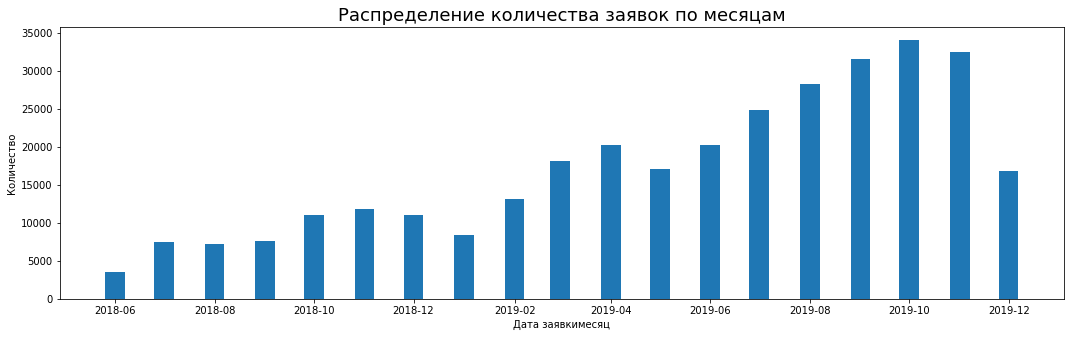

In [80]:
date_distribution(inquires, 'Дата заявки', 'Распределение количества заявок по месяцам')

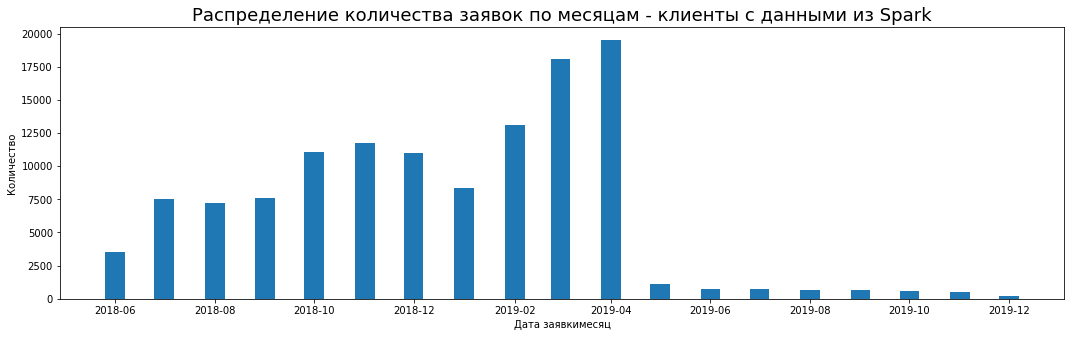

In [79]:
date_distribution(inquires\
                  .loc[lambda x: x['ИНН']\
                  .isin(spark_data['ИНН'].value_counts().index)], 
                  'Дата заявки', 'Распределение количества заявок по месяцам - клиенты с данными из Spark')

In [149]:
#Пример: Нет заявки - есть открытый счет
inquires.loc[lambda x: x['ИНН']=='TLLAEAEELH']

,IdInquiry,ИНН,Дата заявки,Тип организации


In [31]:
print('Количество заявок', inquires.shape[0])
print('Количество уникальных ИНН в заявках', inquires['ИНН'].value_counts().shape[0])

Количество заявок 324852
Количество уникальных ИНН в заявках 243851


# 1.3. Наличие кредитного продукта

In [155]:
cred_products = pd.read_excel('Тестовое задание часть 1/Наличие_кредитного_продукта.xlsx')

In [156]:
cred_products['is_credit'] = 1
cred_products

,inn,is_credit
0,JIFDLDWCKC,1
1,OXUANITWYSYJ,1
2,IJWAMIETEASJ,1
3,VLUUKDPNJBTK,1
4,WIRLKQYSFY,1
...,...,...
9167,GSEXFJYLEA,1
9168,AVYRYXHSVV,1
9169,YXOEYCIGNF,1
9170,CLUDUZJDLE,1


# 1.4. Открытые расчетные счета

Дату 5999 считаем, что не имеет даты закрытия

In [91]:
open_pc = pd.read_excel('Тестовое задание часть 1/Открытые рс.xlsx')

In [92]:
open_pc.loc[lambda x: x['Дата закрытия']==datetime.datetime(5999, 12, 31, 0, 0), 'Дата закрытия'] = np.nan
open_pc['Дата закрытия'] = open_pc['Дата закрытия'].astype('datetime64')

In [75]:
open_pc.dtypes

ИНН                      object
Дата открытия    datetime64[ns]
Дата закрытия    datetime64[ns]
dtype: object

In [8]:
print('Количество счетов', open_pc.shape[0])
print('Количество уникальных ИНН в счетах', open_pc['ИНН'].value_counts().shape[0])

Количество счетов 246933
Количество уникальных ИНН в счетах 218984


### Исходное распределение количество счетов

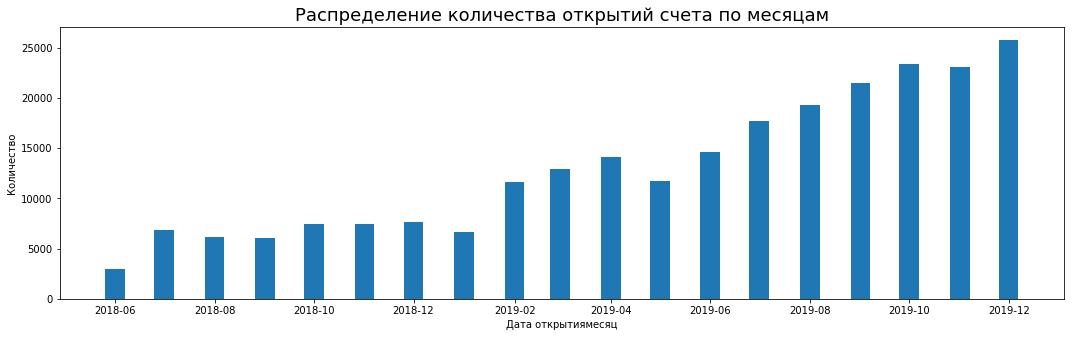

In [82]:
date_distribution(open_pc, 'Дата открытия', 'Распределение количества открытий счета по месяцам')

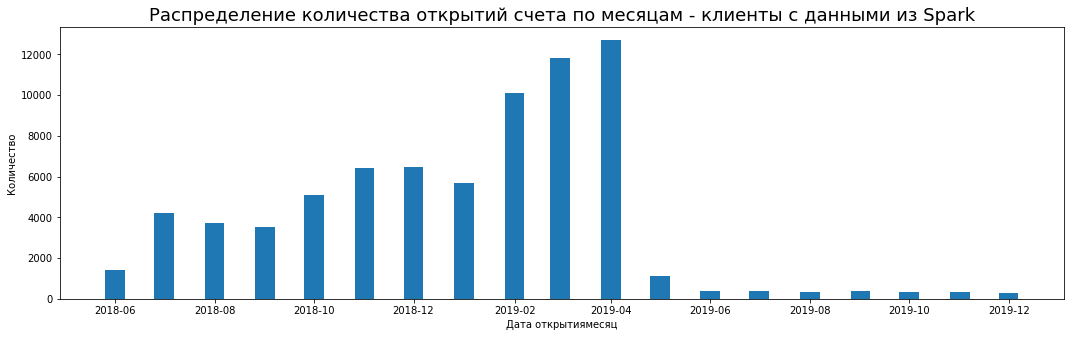

In [83]:
date_distribution(open_pc\
                  .loc[lambda x: x['ИНН']\
                  .isin(spark_data['ИНН'].value_counts().index)], 
                  'Дата открытия', 'Распределение количества открытий счета по месяцам - клиенты с данными из Spark')

### Процент матчинга ИНН между заявками/счетами и данными в Spark сильно снижается с 2019-05

Найдем количество дней от даты закрытия до открытия. Интересны только не закрытые даты, либо положительное значение разницы     
Удалим дубликаты - скорее всего просто дубли по одному и тому же счету

In [93]:
open_pc = (open_pc
              .assign(diff_days=lambda x: (x['Дата закрытия'] - x['Дата открытия']).dt.days)
              .loc[lambda x: (x.diff_days>0) | (x.diff_days).isna()]
              .drop_duplicates()
          )

Получается ситуация, что на один ИНН и дату может быть открыто несколько счетов

In [94]:
open_pc.groupby(['ИНН', 'Дата открытия']).size().sort_values()

ИНН           Дата открытия
AAAAIRYZRC    2019-08-27       1
QVQKOVHXLXTH  2019-11-14       1
QVQLEPVJOXWX  2019-10-29       1
QVQNPBXYBSTT  2019-12-06       1
QVQWFAUPEG    2019-11-28       1
                              ..
DIKURXAYEU    2019-12-13       4
VVKFLLYJIG    2019-02-11       4
CBPFGDKAVD    2019-06-05       4
ANUNZYTXSY    2019-05-16       4
AJNMUIUUOS    2019-03-21       4
Length: 221721, dtype: int64

In [95]:
# Примеры Инн для анализа
#open_pc.loc[lambda x: x['ИНН']=='AJNMUIUUOS']  # 3 разных счета в один день? Считаем, что такое может быть
#open_pc.loc[lambda x: x['ИНН']=='TLLAEAEELH']
#open_pc.loc[lambda x: x['ИНН']=='HRABOWDQOB']

open_pc.loc[lambda x: x['ИНН']=='DIKURXAYEU']

,ИНН,Дата открытия,Дата закрытия,diff_days
4211,DIKURXAYEU,2019-12-13,2020-01-10,28.0
4212,DIKURXAYEU,2019-12-13,2020-02-14,63.0
11055,DIKURXAYEU,2019-12-13,2020-01-24,42.0
165346,DIKURXAYEU,2019-12-13,NaT,NaN


### Оставим один счет по клиенту с максимальной разницей от даты открытия до даты закрытия

In [96]:
open_pc = (open_pc
               .sort_values('diff_days', ascending=False)
               .groupby(['ИНН', 'Дата открытия'])
               .head(1)      
          )

In [97]:
open_pc.loc[lambda x: x['ИНН']=='DIKURXAYEU']

,ИНН,Дата открытия,Дата закрытия,diff_days
4212,DIKURXAYEU,2019-12-13,2020-02-14,63.0


In [56]:
open_pc.groupby(['ИНН', 'Дата открытия']).size().sort_values()

ИНН           Дата открытия
AAAAIRYZRC    2019-08-27       1
RIGYIBPUOY    2018-12-14       1
RIGZHTEEXX    2019-08-14       1
RIHDDAQDFF    2018-11-07       1
RIHFYCEOLUKN  2018-06-28       1
                              ..
IQOENFQHZHRN  2019-11-27       1
IQOGQPKPIH    2018-08-28       1
IQOILBYIGRBB  2019-12-10       1
IQNLYSBSWAHT  2019-02-25       1
ZZZZNXTPDFAG  2019-10-31       1
Length: 221721, dtype: int64

In [98]:
print('Количество счетов', open_pc.shape[0])
print('Количество уникальных ИНН в счетах', open_pc['ИНН'].value_counts().shape[0])

Количество счетов 221721
Количество уникальных ИНН в счетах 218948


# 1.5. Данные Spark

In [33]:
spark_data = pd.read_csv('Тестовое задание часть 2\СПАРК\СПАРК.csv', sep=',', encoding='utf-8')

In [34]:
spark_data

,ИНН,Дата загрузки заявки,Количество компаний с аналогичным директором в том же регионе,"Компания входит в: Юридические лица, в состав исполнительных органов которых входят дисквалифицированные лица","Количество компаний, зарегистрированных на адресе регистрации Организации по данным сайта ФНС",Количество видов деятельности у Клиента,код основного оквэд,Субъект местонахождения,размер уставного капитал ЮЛ,Чистая прибыль (или убыток) компании,...,19 - Суммируем %% размеры долей учредителей – иностранных ЮЛ из секции,20 - Срок регистрации клиента,21 - КодОКВЭД,21 - ПрВерсОКВЭД,23 - a.\tУправляющая организация – берем данные из секции СвУпрОрг,23 - b. Гендиректор – ФЛ,23 - Учредители и их изменение,23 - Учредители – иностранные компании,23 - Учредители - физлица,История смены сооучредителей
0,JVGAVXQOMXDL,2018-09-24 14:04:47.397,0.0,Нет,NaN,32.0,81.29,GN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,VYSZNCKGGM,2018-11-07 09:28:42.913,2.0,Нет,2.0,13.0,46.72,YS,10000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ЮЛ: 14.06.2018 0:00:00; ЮЛ: 18.02.2016 0:00:00
2,OAUNBEVXYM,2018-12-19 05:19:50.927,2.0,Нет,12.0,9.0,46.73,ZY,10000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ЮЛ: 09.10.2018 0:00:00
3,POTUIFVYMPZL,2019-10-25 17:36:45.310,0.0,Нет,NaN,1.0,47.59.1,XT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KVVWUJYQTVFV,2019-02-04 15:10:23.197,0.0,Нет,NaN,1.0,68.20.2,VM,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145502,KFAQLIPCKA,2019-04-03 14:15:00.277,1.0,Нет,1.0,10.0,42.11,MA,10000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ЮЛ: 12.09.2018 0:00:00
145503,HIFKLYRXVZ,2019-04-04 17:35:19.360,1.0,Нет,5.0,25.0,46.71.2,WG,10000.0,380000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ЮЛ: 10.06.2014 0:00:00
145504,EGANXILACT,2018-08-22 11:10:14.593,3.0,Нет,1.0,6.0,46.41,PQ,10000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ЮЛ: 06.12.2017 0:00:00
145505,UOIAGLWUUDHC,2019-04-04 16:35:22.913,NaN,Нет,NaN,11.0,66.22,MK,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
spark_data['ИНН'].value_counts()

AGLSEBFWDV      44
LBZNXHGFEU      39
BZBEMGQSNE      30
OAYYRMFVMF      29
DWHICOTURF      28
                ..
AEOKOHEIEB       1
QBKMMIJHDBGM     1
WFQRETJVKG       1
HFLYVTUKNJWA     1
UJYMHMOXFK       1
Name: ИНН, Length: 100000, dtype: int64

In [38]:
pd.set_option('max_columns', 100)

spark_data.loc[lambda x: x['ИНН']=='LBZNXHGFEU']

,ИНН,Дата загрузки заявки,Количество компаний с аналогичным директором в том же регионе,"Компания входит в: Юридические лица, в состав исполнительных органов которых входят дисквалифицированные лица","Количество компаний, зарегистрированных на адресе регистрации Организации по данным сайта ФНС",Количество видов деятельности у Клиента,код основного оквэд,Субъект местонахождения,размер уставного капитал ЮЛ,Чистая прибыль (или убыток) компании,Отчетный период (год),Пассивы всего,налоговая нагрузка,дата начала полномочий руководителя,Количество соучредителей,Даты внесения соучредителей,Дата регистрации,Количество дочерних,Количество филиалов,Численность компании,"Выручка компании (млн, руб)",Участие в госконтрактах (количество),Участие в госконтрактах (год),Сумма налога,ОПФ Организации,Кредиты,2 - В учредителях/участниках/ акционерах клиента участие государства более 50,3 - ФСФР,3 - РТС,4 - Перечень ОАО по Распоряжению Правительства № 91-Р,"4 - Перечень ФГУП, имеющих существенное значение",4 - Реестр оборонно-промышленного комплекса,"4 - Реестр операторов, осуществляющих обработку персональных данных",5 - Сработал признак «ЮЛ осуществляет отчисления в ПФР по сотрудникам».,"6 - Организация, первое лицо, учредители входит в список «дисквалифицированных»","7 - массовый контактный телефон: в заявке указан телефон, на который зарегистрировано более Х компаний (кроме компаний-агентов)",8 - Количество компаний с аналогичным директором,8 - Количество компаний с аналогичным директором в том же регионе,"17 - Юр. лица, имеющие задолженность по уплате налогов","17 - Юр. лица, не предоставляющие налоговую отчетность более года",24 - вхождение в список недобросовестных поставщиков.,25 - Государственные заказы и контракты Приняла участие (количество),25 - Государственные заказы и контракты Количество заключенных контрактов,25 - Коммерческие заказы и контракты Приняла участие (количество),25 - Коммерческие заказы и контракты Количество заключенных контрактов,Индекс финансового риска,Индекс финансового риска описание,Индекс платежной дисциплины,Индекс платежной дисциплины описание,Индекс должной осмотрительности,Индекс должной осмотрительности описание,Сведения об учредителе (участнике) - российском юридическом лице,Сведения об учредителе (участнике) - иностранном юридическом лице,Сведения об учредителе (участнике) - физическом лице,"Сведения об учредителе (участнике) - Российской Федерации, субъекте Российской Федерации, муниципальном образовании","Сведения о паевом инвестиционном фонде, в состав имущества которого включена доля в уставном капитале",15 - КодОПФ,15 - ПолнНаимОПФ,16 - Размер уставного капитала НаимВидКап,16 - Размер уставного капитала СумКап,18 - Сравниваем сведения о первом лице со сведениями 100% учредителя-ФЛ,19 - Суммируем %% размеры долей учредителей – иностранных ЮЛ из секции,20 - Срок регистрации клиента,21 - КодОКВЭД,21 - ПрВерсОКВЭД,23 - a.\tУправляющая организация – берем данные из секции СвУпрОрг,23 - b. Гендиректор – ФЛ,23 - Учредители и их изменение,23 - Учредители – иностранные компании,23 - Учредители - физлица,История смены сооучредителей
4050,LBZNXHGFEU,2019-03-21 05:40:24.080,1.0,Нет,1.0,8.0,47.11,UU,30000.0,NaN,NaN,NaN,NaN,11.10.2013,1.0,11.10.2013,11.10.2013,NaN,0.0,0 .. 5,NaN,NaN,NaN,NaN,65-Общества с ограниченной ответственностью,False,Нет,NaN,NaN,Нет,Нет,Нет,Нет,NaN,Нет,1.0,3.0,1.0,Нет,Нет,NaN,NaN,NaN,NaN,NaN,44.0,Средний риск,NaN,NaN,54.0,Средний риск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ЮЛ: 11.10.2013 0:00:00
7498,LBZNXHGFEU,2019-03-20 10:55:29.860,1.0,Нет,1.0,8.0,47.11,UU,30000.0,NaN,NaN,NaN,NaN,11.10.2013,1.0,11.10.2013,11.10.2013,NaN,0.0,0 .. 5,NaN,NaN,NaN,NaN,65-Общества с ограниченной ответственностью,False,Нет,NaN,NaN,Нет,Нет,Нет,Нет,NaN,Нет,1.0,3.0,1.0,Нет,Нет,NaN,NaN,NaN,NaN,NaN,44.0,Средний риск,NaN,NaN,54.0,Средний риск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ЮЛ: 11.10.2013 0:00:00
8495,LBZNXHGFEU,2019-03-21 06:33:24.583,1.

По каждой заявке может быть несколько строк данных

# 2. Постановка задачи и сборка датасета (заявки, счета, блокировки)

### Описание датасетов:
1) Заявки - у одного ИНН несколько заявок - агрегировано до дней с максимальным временем   
2) Счета - у одного ИНН несколько счетов дата открытия - максимальная дата закрытия    
3) Наличие кредитного продукта - ИНН уникален   
4) блокировки - у одного ИНН может быть несколько (FDQWKIJXAD)   

### Необходимо разработать модель, которая будет классифицировать поступающие заявки на два класса:    
•Заявка от организации, счет которой не будет заблокирован в течение 6 месяцев после открытия.    
•Заявка от организации, счет которой будет заблокирован в течение 6 месяцев после открытия. 

In [120]:
#Заявки + счета
df = (
      inquires
           .merge(open_pc, how='left', on='ИНН')
           .loc[lambda x: x['Дата открытия'].notna()]
       )
print(df.shape)
df.head()

(258215, 7)


,ИНН,Тип организации,Дата заявки день,Дата заявки,Дата открытия,Дата закрытия,diff_days
0,AAAAIRYZRC,ЮЛ,2019-08-22,2019-08-22 16:03:00,2019-08-27,NaT,NaN
1,AAADCVZNUR,ЮЛ,2019-11-26,2019-11-26 09:20:00,2019-11-28,NaT,NaN
2,AAAFBXICUBOO,ИП,2019-10-30,2019-10-30 16:17:00,2019-10-31,NaT,NaN
3,AAAHFBJQHKRE,ИП,2019-09-25,2019-09-25 16:09:00,2019-10-03,NaT,NaN
4,AAAIPUKREP,ЮЛ,2019-07-09,2019-07-09 15:01:00,2019-07-09,NaT,NaN


### Будем считать, что одобряют последнюю по дате заявку до открытия счета

In [121]:
df = (df
       .assign(diff_days_inquiry_order=lambda x: (x['Дата открытия'] - x['Дата заявки день']).dt.days)
       .loc[lambda x: (x.diff_days_inquiry_order>=0)]
       .sort_values('Дата заявки', ascending=False)
       .groupby(['ИНН', 'Дата открытия'])
       .head(1)
     )

In [122]:
print(df.shape)
df[df['ИНН']=='FUHGQDOJTD']

(184657, 8)


,ИНН,Тип организации,Дата заявки день,Дата заявки,Дата открытия,Дата закрытия,diff_days,diff_days_inquiry_order
73732,FUHGQDOJTD,ЮЛ,2019-07-10,2019-07-10 13:14:00,2019-07-12,NaT,NaN,2
73727,FUHGQDOJTD,ЮЛ,2019-07-01,2019-07-01 05:52:00,2019-07-02,NaT,NaN,1
73722,FUHGQDOJTD,ЮЛ,2019-06-26,2019-06-26 05:31:00,2019-06-27,NaT,NaN,1
73717,FUHGQDOJTD,ЮЛ,2019-06-10,2019-06-10 11:27:00,2019-06-25,NaT,NaN,15


Видим, что ИНН все также не уникален

## Добавим блокировки

In [123]:
df = (df
       .merge(blocks, how='left', on='ИНН')
       .rename(columns={'ИНН':'inn', 'Дата заявки':'date_inquiry', 'Тип организации':'org_type', 'Дата открытия':'date_open_pc',
                        'Дата закрытия': 'date_close_pc', 'Дата блокировки':'date_block'})
     )

for col in ['date_inquiry', 'date_open_pc', 'date_close_pc', 'date_block']:
    df[col] = df[col].astype('datetime64')

In [124]:
df.dtypes

inn                                object
org_type                           object
Дата заявки день           datetime64[ns]
date_inquiry               datetime64[ns]
date_open_pc               datetime64[ns]
date_close_pc              datetime64[ns]
diff_days                         float64
diff_days_inquiry_order             int64
date_block                 datetime64[ns]
dtype: object

In [125]:
print(df.shape)
df.head()

(185623, 9)


,inn,org_type,Дата заявки день,date_inquiry,date_open_pc,date_close_pc,diff_days,diff_days_inquiry_order,date_block
0,GWOBIHCEESIV,ИП,2019-12-14,2019-12-14 15:09:00,2019-12-17,NaT,NaN,3,NaT
1,MMHDXFQTHESN,ИП,2019-12-14,2019-12-14 14:39:00,2019-12-16,NaT,NaN,2,NaT
2,NZVWQJIOPC,ЮЛ,2019-12-14,2019-12-14 14:39:00,2019-12-16,NaT,NaN,2,NaT
3,KQCLSYJDIH,ЮЛ,2019-12-14,2019-12-14 14:26:00,2019-12-18,NaT,NaN,4,NaT
4,ROZNZLNNBW,ЮЛ,2019-12-14,2019-12-14 14:14:00,2019-12-17,NaT,NaN,3,NaT


# 3. Формируем целевую - агрегируем до счета

## 3.1 block_days - количество дней от открытия счета до блокировки

In [126]:
# Оставим только положительные значения разницы от открытия до блокировки. Либо счета без даты блокировки

df = (
       df
         .assign(block_days=lambda x: (x.date_block - x.date_open_pc).dt.days)
         .loc[lambda x: (x.block_days>0) | (x.block_days).isna()]
     )

In [127]:
df.loc[lambda x: x.inn=='IZPRLMGSPA']

,inn,org_type,Дата заявки день,date_inquiry,date_open_pc,date_close_pc,diff_days,diff_days_inquiry_order,date_block,block_days
136293,IZPRLMGSPA,ЮЛ,2019-03-18,2019-03-18 17:29:00,2019-03-19,2019-10-11,206.0,1,2019-06-04,77.0
136294,IZPRLMGSPA,ЮЛ,2019-03-18,2019-03-18 17:29:00,2019-03-19,2019-10-11,206.0,1,2019-09-13,178.0
146149,IZPRLMGSPA,ЮЛ,2019-02-12,2019-02-12 15:49:00,2019-02-12,2019-07-16,154.0,0,2019-06-04,112.0
146150,IZPRLMGSPA,ЮЛ,2019-02-12,2019-02-12 15:49:00,2019-02-12,2019-07-16,154.0,0,2019-09-13,213.0


### Будем брать худший вариант - когда от даты открытия счета до блокировки прошло минимальное число дней

In [128]:
df = (
      df
        .sort_values('block_days', ascending=True)
        .groupby(['inn', 'date_open_pc'])
        .head(1)
      )

In [129]:
df.loc[lambda x: x.inn=='IZPRLMGSPA']

,inn,org_type,Дата заявки день,date_inquiry,date_open_pc,date_close_pc,diff_days,diff_days_inquiry_order,date_block,block_days
136293,IZPRLMGSPA,ЮЛ,2019-03-18,2019-03-18 17:29:00,2019-03-19,2019-10-11,206.0,1,2019-06-04,77.0
146149,IZPRLMGSPA,ЮЛ,2019-02-12,2019-02-12 15:49:00,2019-02-12,2019-07-16,154.0,0,2019-06-04,112.0


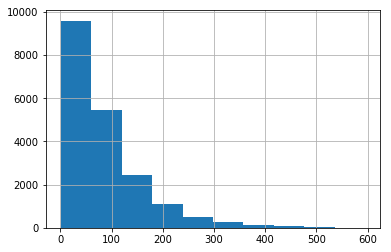

In [95]:
#Распределение дней блокировок
df.block_days.hist()

## 3.2 Формирование таргета

In [136]:
df['target'] = df['block_days']
df.loc[lambda x: x.target.isna(), 'target'] = 0

# Если блокировки не было или она была позднее 180 дней - событие не целевое
df['target'] = df['target'].map(lambda x: 0 if ((x>180) | (x==0)) else 1)

In [137]:
df.target.value_counts()

0    167123
1     17517
Name: target, dtype: int64

In [141]:
df.loc[lambda x: x.inn=='IZPRLMGSPA']

,inn,org_type,Дата заявки день,date_inquiry,date_open_pc,date_close_pc,diff_days,diff_days_inquiry_order,date_block,block_days,target
136293,IZPRLMGSPA,ЮЛ,2019-03-18,2019-03-18 17:29:00,2019-03-19,2019-10-11,206.0,1,2019-06-04,77.0,1
146149,IZPRLMGSPA,ЮЛ,2019-02-12,2019-02-12 15:49:00,2019-02-12,2019-07-16,154.0,0,2019-06-04,112.0,1


In [100]:
df.groupby(['inn', 'date_open_pc']).size().sort_values()

inn           date_open_pc
AAAAIRYZRC    2019-08-27      1
RIDYZNMLRH    2019-11-01      1
RIDYZOSHBG    2018-06-20      1
RIDZKSESVPFU  2019-07-01      1
RIEBFUZOHF    2019-11-08      1
                             ..
IQNLYSBSWAHT  2019-02-25      1
IQNOCKWZZEKZ  2018-07-03      1
IQNTVRNSLZ    2019-01-31      1
IQNYKBOGKW    2018-12-24      1
ZZZZNXTPDFAG  2019-10-31      1
Length: 184640, dtype: int64

In [142]:
print('Количество счетов', df.shape[0])
print('Количество уникальных ИНН', df['inn'].value_counts().shape[0])

Количество счетов 184640
Количество уникальных ИНН 182403


Итог: размечены целевые события - группировка 'inn'+ 'date_open_pc'. У одного ИНН могли быть счета в разные дни

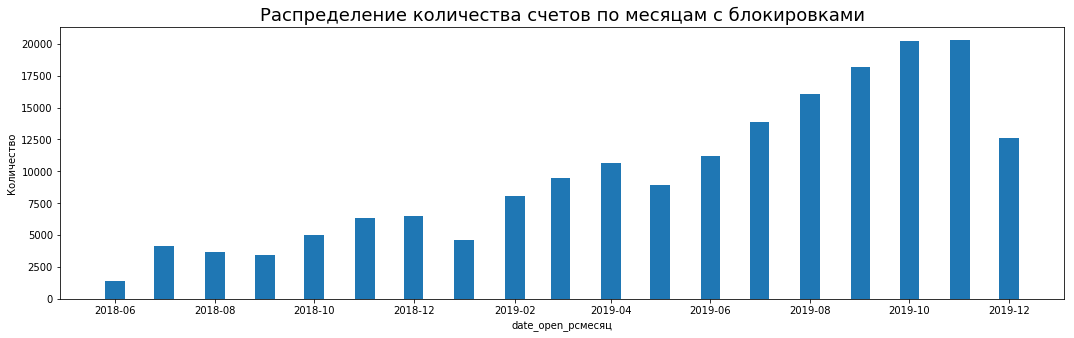

In [135]:
date_distribution(df, 'date_open_pc', 'Распределение количества счетов по месяцам с блокировками')

# 4. Добавление данных (Spark+ наличие кредитов)

In [143]:
df = df.merge(spark_data, left_on='inn', right_on='ИНН', how='left')

In [144]:
df.inn.value_counts()

AGLSEBFWDV      44
LBZNXHGFEU      39
BZBEMGQSNE      30
DWHICOTURF      28
GQBFPGXAVPHM    27
                ..
GNURDCNGHVHB     1
XCVVXVNSJO       1
DRABHXRTBCPD     1
LGUOFBAAOOSW     1
XXWEMGSOKIFF     1
Name: inn, Length: 182403, dtype: int64

### Выберем наиболее подходящую строчку из логов для конкретной заявки

In [145]:
df['Дата загрузки заявки'] = (
                                 df['Дата загрузки заявки']
                                    .astype('str')
                                    .apply(lambda x: x[:19])
                                    .astype('datetime64')
                               )

In [147]:
#Пример
pd.set_option('max_columns', 100)
df.loc[lambda x: x['ИНН']=='QSLWIOCSGG'].head()

,inn,org_type,Дата заявки день,date_inquiry,date_open_pc,date_close_pc,diff_days,diff_days_inquiry_order,date_block,block_days,target,ИНН,Дата загрузки заявки,Количество компаний с аналогичным директором в том же регионе,"Компания входит в: Юридические лица, в состав исполнительных органов которых входят дисквалифицированные лица","Количество компаний, зарегистрированных на адресе регистрации Организации по данным сайта ФНС",Количество видов деятельности у Клиента,код основного оквэд,Субъект местонахождения,размер уставного капитал ЮЛ,Чистая прибыль (или убыток) компании,Отчетный период (год),Пассивы всего,налоговая нагрузка,дата начала полномочий руководителя,Количество соучредителей,Даты внесения соучредителей,Дата регистрации,Количество дочерних,Количество филиалов,Численность компании,"Выручка компании (млн, руб)",Участие в госконтрактах (количество),Участие в госконтрактах (год),Сумма налога,ОПФ Организации,Кредиты,2 - В учредителях/участниках/ акционерах клиента участие государства более 50,3 - ФСФР,3 - РТС,4 - Перечень ОАО по Распоряжению Правительства № 91-Р,"4 - Перечень ФГУП, имеющих существенное значение",4 - Реестр оборонно-промышленного комплекса,"4 - Реестр операторов, осуществляющих обработку персональных данных",5 - Сработал признак «ЮЛ осуществляет отчисления в ПФР по сотрудникам».,"6 - Организация, первое лицо, учредители входит в список «дисквалифицированных»","7 - массовый контактный телефон: в заявке указан телефон, на который зарегистрировано более Х компаний (кроме компаний-агентов)",8 - Количество компаний с аналогичным директором,8 - Количество компаний с аналогичным директором в том же регионе,"17 - Юр. лица, имеющие задолженность по уплате налогов","17 - Юр. лица, не предоставляющие налоговую отчетность более года",24 - вхождение в список недобросовестных поставщиков.,25 - Государственные заказы и контракты Приняла участие (количество),25 - Государственные заказы и контракты Количество заключенных контрактов,25 - Коммерческие заказы и контракты Приняла участие (количество),25 - Коммерческие заказы и контракты Количество заключенных контрактов,Индекс финансового риска,Индекс финансового риска описание,Индекс платежной дисциплины,Индекс платежной дисциплины описание,Индекс должной осмотрительности,Индекс должной осмотрительности описание,Сведения об учредителе (участнике) - российском юридическом лице,Сведения об учредителе (участнике) - иностранном юридическом лице,Сведения об учредителе (участнике) - физическом лице,"Сведения об учредителе (участнике) - Российской Федерации, субъекте Российской Федерации, муниципальном образовании","Сведения о паевом инвестиционном фонде, в состав имущества которого включена доля в уставном капитале",15 - КодОПФ,15 - ПолнНаимОПФ,16 - Размер уставного капитала НаимВидКап,16 - Размер уставного капитала СумКап,18 - Сравниваем сведения о первом лице со сведениями 100% учредителя-ФЛ,19 - Суммируем %% размеры долей учредителей – иностранных ЮЛ из секции,20 - Срок регистрации клиента,21 - КодОКВЭД,21 - ПрВерсОКВЭД,23 - a.\tУправляющая организация – берем данные из секции СвУпрОрг,23 - b. Гендиректор – ФЛ,23 - Учредители и их изменение,23 - Учредители – иностранные компании,23 - Учредители - физлица,История смены сооучредителей
4283,QSLWIOCSGG,ЮЛ,2019-08-08,2019-08-08 05:42:00,2019-08-12,2019-10-08,57.0,4,2019-09-05,24.0,1,QSLWIOCSGG,2019-02-14 06:38:02,1.0,Нет,1.0,16.0,46.90,NP,10000.0,NaN,NaN,NaN,NaN,11.05.2018,1.0,11.05.2018,11.05.2018,NaN,0.0,NaN,NaN,NaN,NaN,NaN,65-Общества с ограниченной ответственностью,False,Нет,NaN,NaN,Нет,Нет,Нет,Нет,NaN,Нет,0.0,1.0,1.0,Нет,Нет,NaN,NaN,NaN,NaN,NaN,62.0,Средний риск,NaN,NaN,55.0,Средний риск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ЮЛ: 11.05.2018 0:00:00
4284,QSLWIOCSGG,ЮЛ,2019-08-08,2019-08-08 05:42:00,2019-08-12,2019-10-08,57.0,4,2019-09-05,24.0,1,QSLWIOCSGG,2019-04-29 11:19:43,1.0,Нет,1.0,16.0,46.90,NP,10000.0,NaN,NaN,NaN,NaN,11.05.2018,1.0,11.05.2018,11.05.2018,NaN,0.0,NaN,NaN,NaN,NaN,NaN,65-Общ

### Смотрим, что данные по клиенту были раньше, чем пришедшая заявка. Сохраняем временную последовательность 
Возьмем самую ближнюю по времени информацию к заявке

In [148]:
df = (df
        .assign(diff_date_inquiry_spark_data=lambda x: (x.date_inquiry - x['Дата загрузки заявки']).dt.seconds)
        .loc[lambda x: (x.diff_date_inquiry_spark_data>0) | (x.block_days).isna()]
        .sort_values('diff_date_inquiry_spark_data', ascending=True)
        .groupby(['inn', 'date_open_pc'])
        .head(1)
     )

In [149]:
df.loc[lambda x: x['ИНН']=='QSLWIOCSGG']

,inn,org_type,Дата заявки день,date_inquiry,date_open_pc,date_close_pc,diff_days,diff_days_inquiry_order,date_block,block_days,target,ИНН,Дата загрузки заявки,Количество компаний с аналогичным директором в том же регионе,"Компания входит в: Юридические лица, в состав исполнительных органов которых входят дисквалифицированные лица","Количество компаний, зарегистрированных на адресе регистрации Организации по данным сайта ФНС",Количество видов деятельности у Клиента,код основного оквэд,Субъект местонахождения,размер уставного капитал ЮЛ,Чистая прибыль (или убыток) компании,Отчетный период (год),Пассивы всего,налоговая нагрузка,дата начала полномочий руководителя,Количество соучредителей,Даты внесения соучредителей,Дата регистрации,Количество дочерних,Количество филиалов,Численность компании,"Выручка компании (млн, руб)",Участие в госконтрактах (количество),Участие в госконтрактах (год),Сумма налога,ОПФ Организации,Кредиты,2 - В учредителях/участниках/ акционерах клиента участие государства более 50,3 - ФСФР,3 - РТС,4 - Перечень ОАО по Распоряжению Правительства № 91-Р,"4 - Перечень ФГУП, имеющих существенное значение",4 - Реестр оборонно-промышленного комплекса,"4 - Реестр операторов, осуществляющих обработку персональных данных",5 - Сработал признак «ЮЛ осуществляет отчисления в ПФР по сотрудникам».,"6 - Организация, первое лицо, учредители входит в список «дисквалифицированных»","7 - массовый контактный телефон: в заявке указан телефон, на который зарегистрировано более Х компаний (кроме компаний-агентов)",8 - Количество компаний с аналогичным директором,8 - Количество компаний с аналогичным директором в том же регионе,"17 - Юр. лица, имеющие задолженность по уплате налогов","17 - Юр. лица, не предоставляющие налоговую отчетность более года",24 - вхождение в список недобросовестных поставщиков.,25 - Государственные заказы и контракты Приняла участие (количество),25 - Государственные заказы и контракты Количество заключенных контрактов,25 - Коммерческие заказы и контракты Приняла участие (количество),25 - Коммерческие заказы и контракты Количество заключенных контрактов,Индекс финансового риска,Индекс финансового риска описание,Индекс платежной дисциплины,Индекс платежной дисциплины описание,Индекс должной осмотрительности,Индекс должной осмотрительности описание,Сведения об учредителе (участнике) - российском юридическом лице,Сведения об учредителе (участнике) - иностранном юридическом лице,Сведения об учредителе (участнике) - физическом лице,"Сведения об учредителе (участнике) - Российской Федерации, субъекте Российской Федерации, муниципальном образовании","Сведения о паевом инвестиционном фонде, в состав имущества которого включена доля в уставном капитале",15 - КодОПФ,15 - ПолнНаимОПФ,16 - Размер уставного капитала НаимВидКап,16 - Размер уставного капитала СумКап,18 - Сравниваем сведения о первом лице со сведениями 100% учредителя-ФЛ,19 - Суммируем %% размеры долей учредителей – иностранных ЮЛ из секции,20 - Срок регистрации клиента,21 - КодОКВЭД,21 - ПрВерсОКВЭД,23 - a.\tУправляющая организация – берем данные из секции СвУпрОрг,23 - b. Гендиректор – ФЛ,23 - Учредители и их изменение,23 - Учредители – иностранные компании,23 - Учредители - физлица,История смены сооучредителей,diff_date_inquiry_spark_data
4290,QSLWIOCSGG,ЮЛ,2019-08-08,2019-08-08 05:42:00,2019-08-12,2019-10-08,57.0,4,2019-09-05,24.0,1,QSLWIOCSGG,2019-08-08 05:39:22,1.0,Нет,1.0,20.0,20.53,NP,10000.0,NaN,NaN,NaN,NaN,11.05.2018,1.0,11.05.2018,11.05.2018,NaN,0.0,0 .. 5,NaN,NaN,NaN,NaN,65-Общества с ограниченной ответственностью,False,Нет,NaN,NaN,Нет,Нет,Нет,Нет,NaN,Нет,0.0,1.0,1.0,Нет,Нет,NaN,NaN,NaN,NaN,NaN,78.0,Высокий риск,NaN,NaN,52.0,Средний риск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ЮЛ: 11.05.2018 0:00:00,158.0


# 5. Итоговый датасет

In [150]:
print('Размерность df:', df.shape)
df.head()

Размерность df: (173731, 83)


,inn,org_type,Дата заявки день,date_inquiry,date_open_pc,date_close_pc,diff_days,diff_days_inquiry_order,date_block,block_days,target,ИНН,Дата загрузки заявки,Количество компаний с аналогичным директором в том же регионе,"Компания входит в: Юридические лица, в состав исполнительных органов которых входят дисквалифицированные лица","Количество компаний, зарегистрированных на адресе регистрации Организации по данным сайта ФНС",Количество видов деятельности у Клиента,код основного оквэд,Субъект местонахождения,размер уставного капитал ЮЛ,Чистая прибыль (или убыток) компании,Отчетный период (год),Пассивы всего,налоговая нагрузка,дата начала полномочий руководителя,Количество соучредителей,Даты внесения соучредителей,Дата регистрации,Количество дочерних,Количество филиалов,Численность компании,"Выручка компании (млн, руб)",Участие в госконтрактах (количество),Участие в госконтрактах (год),Сумма налога,ОПФ Организации,Кредиты,2 - В учредителях/участниках/ акционерах клиента участие государства более 50,3 - ФСФР,3 - РТС,4 - Перечень ОАО по Распоряжению Правительства № 91-Р,"4 - Перечень ФГУП, имеющих существенное значение",4 - Реестр оборонно-промышленного комплекса,"4 - Реестр операторов, осуществляющих обработку персональных данных",5 - Сработал признак «ЮЛ осуществляет отчисления в ПФР по сотрудникам».,"6 - Организация, первое лицо, учредители входит в список «дисквалифицированных»","7 - массовый контактный телефон: в заявке указан телефон, на который зарегистрировано более Х компаний (кроме компаний-агентов)",8 - Количество компаний с аналогичным директором,8 - Количество компаний с аналогичным директором в том же регионе,"17 - Юр. лица, имеющие задолженность по уплате налогов","17 - Юр. лица, не предоставляющие налоговую отчетность более года",24 - вхождение в список недобросовестных поставщиков.,25 - Государственные заказы и контракты Приняла участие (количество),25 - Государственные заказы и контракты Количество заключенных контрактов,25 - Коммерческие заказы и контракты Приняла участие (количество),25 - Коммерческие заказы и контракты Количество заключенных контрактов,Индекс финансового риска,Индекс финансового риска описание,Индекс платежной дисциплины,Индекс платежной дисциплины описание,Индекс должной осмотрительности,Индекс должной осмотрительности описание,Сведения об учредителе (участнике) - российском юридическом лице,Сведения об учредителе (участнике) - иностранном юридическом лице,Сведения об учредителе (участнике) - физическом лице,"Сведения об учредителе (участнике) - Российской Федерации, субъекте Российской Федерации, муниципальном образовании","Сведения о паевом инвестиционном фонде, в состав имущества которого включена доля в уставном капитале",15 - КодОПФ,15 - ПолнНаимОПФ,16 - Размер уставного капитала НаимВидКап,16 - Размер уставного капитала СумКап,18 - Сравниваем сведения о первом лице со сведениями 100% учредителя-ФЛ,19 - Суммируем %% размеры долей учредителей – иностранных ЮЛ из секции,20 - Срок регистрации клиента,21 - КодОКВЭД,21 - ПрВерсОКВЭД,23 - a.\tУправляющая организация – берем данные из секции СвУпрОрг,23 - b. Гендиректор – ФЛ,23 - Учредители и их изменение,23 - Учредители – иностранные компании,23 - Учредители - физлица,История смены сооучредителей,diff_date_inquiry_spark_data
168057,QZSCOUYDPK,ЮЛ,2019-03-13,2019-03-13 12:12:00,2019-03-13,NaT,NaN,0,NaT,NaN,0,QZSCOUYDPK,2019-03-13 12:12:00,2.0,Нет,1.0,10.0,52.24,JH,10000.0,NaN,NaN,NaN,NaN,24.01.2018,1.0,24.01.2018,24.01.2018,NaN,0.0,NaN,NaN,NaN,NaN,NaN,65-Общества с ограниченной ответственностью,False,Нет,NaN,NaN,Нет,Нет,Нет,Нет,NaN,Нет,1.0,2.0,2.0,Нет,Нет,NaN,NaN,NaN,NaN,NaN,68.0,Средний риск,NaN,NaN,61.0,Средний риск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ЮЛ: 24.01.2018 0:00:00,0.0
176190,XGJYAHPQJUMT,ИП,2019-02-18,2019-02-18 10:44:00,2019-02-18,NaT,NaN,0,NaT,NaN,0,XGJYAHPQJUMT,2019-02-18 10:44:00,0.0,Нет,NaN,3.0,47.78,IC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.10.2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50102-Индивидуал

In [151]:
print('Количество счетов', df.shape[0])
print('Количество уникальных ИНН', df['inn'].value_counts().shape[0])

Количество счетов 173731
Количество уникальных ИНН 171632


Некоторые ИНН имеют разные счета

In [152]:
df.inn.value_counts().value_counts()

1    169577
2      2013
3        40
4         2
Name: inn, dtype: int64

Пример:

In [153]:
df.loc[lambda x: x['inn']=='FUHGQDOJTD']

,inn,org_type,Дата заявки день,date_inquiry,date_open_pc,date_close_pc,diff_days,diff_days_inquiry_order,date_block,block_days,target,ИНН,Дата загрузки заявки,Количество компаний с аналогичным директором в том же регионе,"Компания входит в: Юридические лица, в состав исполнительных органов которых входят дисквалифицированные лица","Количество компаний, зарегистрированных на адресе регистрации Организации по данным сайта ФНС",Количество видов деятельности у Клиента,код основного оквэд,Субъект местонахождения,размер уставного капитал ЮЛ,Чистая прибыль (или убыток) компании,Отчетный период (год),Пассивы всего,налоговая нагрузка,дата начала полномочий руководителя,Количество соучредителей,Даты внесения соучредителей,Дата регистрации,Количество дочерних,Количество филиалов,Численность компании,"Выручка компании (млн, руб)",Участие в госконтрактах (количество),Участие в госконтрактах (год),Сумма налога,ОПФ Организации,Кредиты,2 - В учредителях/участниках/ акционерах клиента участие государства более 50,3 - ФСФР,3 - РТС,4 - Перечень ОАО по Распоряжению Правительства № 91-Р,"4 - Перечень ФГУП, имеющих существенное значение",4 - Реестр оборонно-промышленного комплекса,"4 - Реестр операторов, осуществляющих обработку персональных данных",5 - Сработал признак «ЮЛ осуществляет отчисления в ПФР по сотрудникам».,"6 - Организация, первое лицо, учредители входит в список «дисквалифицированных»","7 - массовый контактный телефон: в заявке указан телефон, на который зарегистрировано более Х компаний (кроме компаний-агентов)",8 - Количество компаний с аналогичным директором,8 - Количество компаний с аналогичным директором в том же регионе,"17 - Юр. лица, имеющие задолженность по уплате налогов","17 - Юр. лица, не предоставляющие налоговую отчетность более года",24 - вхождение в список недобросовестных поставщиков.,25 - Государственные заказы и контракты Приняла участие (количество),25 - Государственные заказы и контракты Количество заключенных контрактов,25 - Коммерческие заказы и контракты Приняла участие (количество),25 - Коммерческие заказы и контракты Количество заключенных контрактов,Индекс финансового риска,Индекс финансового риска описание,Индекс платежной дисциплины,Индекс платежной дисциплины описание,Индекс должной осмотрительности,Индекс должной осмотрительности описание,Сведения об учредителе (участнике) - российском юридическом лице,Сведения об учредителе (участнике) - иностранном юридическом лице,Сведения об учредителе (участнике) - физическом лице,"Сведения об учредителе (участнике) - Российской Федерации, субъекте Российской Федерации, муниципальном образовании","Сведения о паевом инвестиционном фонде, в состав имущества которого включена доля в уставном капитале",15 - КодОПФ,15 - ПолнНаимОПФ,16 - Размер уставного капитала НаимВидКап,16 - Размер уставного капитала СумКап,18 - Сравниваем сведения о первом лице со сведениями 100% учредителя-ФЛ,19 - Суммируем %% размеры долей учредителей – иностранных ЮЛ из секции,20 - Срок регистрации клиента,21 - КодОКВЭД,21 - ПрВерсОКВЭД,23 - a.\tУправляющая организация – берем данные из секции СвУпрОрг,23 - b. Гендиректор – ФЛ,23 - Учредители и их изменение,23 - Учредители – иностранные компании,23 - Учредители - физлица,История смены сооучредителей,diff_date_inquiry_spark_data
116274,FUHGQDOJTD,ЮЛ,2019-07-10,2019-07-10 13:14:00,2019-07-12,NaT,NaN,2,NaT,NaN,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119891,FUHGQDOJTD,ЮЛ,2019-07-01,2019-07-01 05:52:00,2019-07-02,NaT,NaN,1,NaT,NaN,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

### ! Причем по этому клиенту не было данных в Spark. Всего таких клиентов больше половины

In [130]:
df[df['ИНН'].isna()].shape[0]

107659

## Таблица наличия кредитов

In [157]:
df = (df
        .rename(columns={'ИНН':'spark_data_is_exist'})
        .merge(cred_products, on='inn', how='left')
     )

## Сохранение

In [158]:
print(df.shape)
df.head()

(176801, 84)


,inn,org_type,Дата заявки день,date_inquiry,date_open_pc,date_close_pc,diff_days,diff_days_inquiry_order,date_block,block_days,target,spark_data_is_exist,Дата загрузки заявки,Количество компаний с аналогичным директором в том же регионе,"Компания входит в: Юридические лица, в состав исполнительных органов которых входят дисквалифицированные лица","Количество компаний, зарегистрированных на адресе регистрации Организации по данным сайта ФНС",Количество видов деятельности у Клиента,код основного оквэд,Субъект местонахождения,размер уставного капитал ЮЛ,Чистая прибыль (или убыток) компании,Отчетный период (год),Пассивы всего,налоговая нагрузка,дата начала полномочий руководителя,Количество соучредителей,Даты внесения соучредителей,Дата регистрации,Количество дочерних,Количество филиалов,Численность компании,"Выручка компании (млн, руб)",Участие в госконтрактах (количество),Участие в госконтрактах (год),Сумма налога,ОПФ Организации,Кредиты,2 - В учредителях/участниках/ акционерах клиента участие государства более 50,3 - ФСФР,3 - РТС,4 - Перечень ОАО по Распоряжению Правительства № 91-Р,"4 - Перечень ФГУП, имеющих существенное значение",4 - Реестр оборонно-промышленного комплекса,"4 - Реестр операторов, осуществляющих обработку персональных данных",5 - Сработал признак «ЮЛ осуществляет отчисления в ПФР по сотрудникам».,"6 - Организация, первое лицо, учредители входит в список «дисквалифицированных»","7 - массовый контактный телефон: в заявке указан телефон, на который зарегистрировано более Х компаний (кроме компаний-агентов)",8 - Количество компаний с аналогичным директором,8 - Количество компаний с аналогичным директором в том же регионе,"17 - Юр. лица, имеющие задолженность по уплате налогов","17 - Юр. лица, не предоставляющие налоговую отчетность более года",24 - вхождение в список недобросовестных поставщиков.,25 - Государственные заказы и контракты Приняла участие (количество),25 - Государственные заказы и контракты Количество заключенных контрактов,25 - Коммерческие заказы и контракты Приняла участие (количество),25 - Коммерческие заказы и контракты Количество заключенных контрактов,Индекс финансового риска,Индекс финансового риска описание,Индекс платежной дисциплины,Индекс платежной дисциплины описание,Индекс должной осмотрительности,Индекс должной осмотрительности описание,Сведения об учредителе (участнике) - российском юридическом лице,Сведения об учредителе (участнике) - иностранном юридическом лице,Сведения об учредителе (участнике) - физическом лице,"Сведения об учредителе (участнике) - Российской Федерации, субъекте Российской Федерации, муниципальном образовании","Сведения о паевом инвестиционном фонде, в состав имущества которого включена доля в уставном капитале",15 - КодОПФ,15 - ПолнНаимОПФ,16 - Размер уставного капитала НаимВидКап,16 - Размер уставного капитала СумКап,18 - Сравниваем сведения о первом лице со сведениями 100% учредителя-ФЛ,19 - Суммируем %% размеры долей учредителей – иностранных ЮЛ из секции,20 - Срок регистрации клиента,21 - КодОКВЭД,21 - ПрВерсОКВЭД,23 - a.\tУправляющая организация – берем данные из секции СвУпрОрг,23 - b. Гендиректор – ФЛ,23 - Учредители и их изменение,23 - Учредители – иностранные компании,23 - Учредители - физлица,История смены сооучредителей,diff_date_inquiry_spark_data,is_credit
0,QZSCOUYDPK,ЮЛ,2019-03-13,2019-03-13 12:12:00,2019-03-13,NaT,NaN,0,NaT,NaN,0,QZSCOUYDPK,2019-03-13 12:12:00,2.0,Нет,1.0,10.0,52.24,JH,10000.0,NaN,NaN,NaN,NaN,24.01.2018,1.0,24.01.2018,24.01.2018,NaN,0.0,NaN,NaN,NaN,NaN,NaN,65-Общества с ограниченной ответственностью,False,Нет,NaN,NaN,Нет,Нет,Нет,Нет,NaN,Нет,1.0,2.0,2.0,Нет,Нет,NaN,NaN,NaN,NaN,NaN,68.0,Средний риск,NaN,NaN,61.0,Средний риск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ЮЛ: 24.01.2018 0:00:00,0.0,NaN
1,XGJYAHPQJUMT,ИП,2019-02-18,2019-02-18 10:44:00,2019-02-18,NaT,NaN,0,NaT,NaN,0,XGJYAHPQJUMT,2019-02-18 10:44:00,0.0,Нет,NaN,3.0,47.78,IC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.10.2018,NaN,NaN,NaN,NaN,NaN,NaN,

In [142]:
df.to_csv('vtb_dataset_target.csv', index=False, sep=';', encoding='cp1251')

### Примечание: % матчинга ИНН между заявками/счетами и данными в Spark сильно снижается с 2019-05
### Гипотеза: возможно данные еще не загружены в базу в период формирования целевой в 180 дней
### Из датасета обучения придется исключить эти наблюдения без данных spark